# Capstone project: Find the optimal location to start a restaurant in Toronto



## 1. Introduction


Dongjun is a new immigrant from Korea to the Toronto city, and he would like to start a Korean restaurant.  According to South Korea's Ministry of Foreign Affairs and Trade, there were 240,942 ethnic Koreans or people of Korean descent in Canada as of 2017. With its diverse demographic of Toronto, we intend to help Dongjun find the optimal location to start a Korean restaurant in the city of Toronto. 

## 2. A description of the data and how to use them

First, we need to obtain the neighborhood and its geospatial data of Toronto from a publicly available database, e.g., https://open.toronto.ca/dataset/neighbourhood-profiles/. More importantly, we would like to know our potential customers for Dongjun’s business. The income of each neighborhood is also an important factor, we would like to find a neighborhood with a high median income. On top of that, we would focus on residents with Korean origin (who can speak Korean, or who characterized themselves of Korean ancestry) in a neighborhood. The demographic data of Toronto is hence necessary here. Also, we will use the Foursquare API to obtain detailed information on existing Korean restaurants in each neighborhood and find its competitors in each neighborhood. Lastly, we will combine data from foursquare with demographic data to find a solution to Dongjun’s question.
First, download all the dependencies that we will need.

First, download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Import the neighbourhood data from a CSV file downloaded on https://open.toronto.ca/dataset/neighbourhood-profiles/
This file named as neighbourhood.csv has been uploade to my own waston studio. To open it, we have to use "project.get_file"
The credential is hidden on purpose to protect my privacy.

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
my_file = project.get_file("neighbourhood.csv")
# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
toronto_nb=pd.read_csv(my_file)


In [4]:
toronto_nb.head(3)

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

And we also need to drop the column "_id", "topic", "source",

In [5]:
toronto_nb1=toronto_nb.drop(columns=["_id", "Data Source","Category","City of Toronto"])
toronto_nb1.head(10)

,Topic,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Number,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,TSNS2020 Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designation,NIA,No Designation,No Designation,Emerging Neighbourhood,No Designation,No Designation,No Designation,No Designation,No Desig

Since the size of dataframe is huge, only several key data were selected including average individual income and mother tongue based on the topic column.

In [6]:
toronto_nb1['Characteristic'] = toronto_nb1['Characteristic'].str.strip()
toronto_nb1.head(10)

,Topic,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Number,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,TSNS2020 Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designation,NIA,No Designation,No Designation,Emerging Neighbourhood,No Designation,No Designation,No Designation,No Designation,No Desig

Select all the info related to our problem (Korean and Income)

In [7]:
#toronto_nb2=toronto_nb1.iloc[[2,332,887,1344,1605,2197]]    
#toronto_nb2=toronto_nb1.iloc[[2,332,887,1344,1605,2197,2272]] 
toronto_nb2=toronto_nb1.loc[(toronto_nb1["Characteristic"]=="Korean")|(toronto_nb1["Characteristic"]=="Population, 2016")|(toronto_nb1["Characteristic"]=="Total income: Average amount ($)")] 
toronto_nb2=toronto_nb2.drop(columns=["Characteristic"])
toronto_nb2.head(10)

,Topic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
2,Population and dwellings,"29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154","23,236","6,577","29,960","22,291","21,737","7,727","14,257","9,266","11,499","17,757","11,669","9,955","10,968","13,362","31,340","26,984","16,472","15,935","14,133","9,666","17,180","27,051","25,003","36,625","35,052","11,785","21,381","15,535","22,776","9,456","22,372","18,588","11,848","21,933","12,806","10,732","30,491","14,417","9,917","15,723","22,162","23,925","12,494","16,934","10,948","12,416","15,545","14,365","13,641","43,965","14,366","11,058","17,123","17,945","22,000","9,271","7,985","43,993","16,164","14,607","15,179","16,828","15,559","10,084","43,794","10,111","10,554","26,572","33,964","17,455","20,506","13,593","32,954","16,775","29,658","11,463","16,097","23,831","31,180","11,916","18,615","13,845","21,210","18,675","9,233","13,826","34,805","10,722","7,804","15,818","11,051","10,803","10,529","22,246","14,974","20,923","46,496","10,070","9,941","16,724","21,849","27,876","17,812","24,623","25,051","27,446","15,683","21,567","10,360","21,108","16,556","7,607","17,510","65,913","27,392","33,312","26,274","17,992","11,098","27,917","50,434","16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
332,Mother tongue,50,80,30,420,420,270,"1,120","1,395",620,145,5,160,35,20,20,60,120,55,35,105,10,40,35,640,85,215,30,60,50,65,740,40,260,95,85,115,180,40,35,105,360,205,180,70,45,15,45,25,380,295,175,60,470,105,15,75,125,25,"1,480",65,25,45,255,180,60,2

Unklike usual dataframe, here each neighbourhood takes a whole column. So we need to preprocess the data.
So we need to transpose the dataframe.  We then need to reindex the dataframe by neighbourhood number.
Also we need to change the column name to better illustrate data's meaning.

In [8]:
toronto_nb3=toronto_nb2.set_index('Topic').T
#toronto_nb3=toronto_nb2.transpose()
toronto_nb3.reset_index(drop = False, inplace = True)
toronto_nb3.rename(columns={"index": "Neighbourhood"},inplace = True)
toronto_nb3.rename(columns={"Population and dwellings": "Total Population"},inplace = True)
toronto_nb3.rename(columns={"Mother tongue": "Mother tongue Korean"},inplace = True)
toronto_nb3.rename(columns={"Language spoken most often at home": "Speaking Korean at home"},inplace = True)
toronto_nb3.rename(columns={"Knowledge of languages": "Knowledge of Korean"},inplace = True)
toronto_nb3.rename(columns={"Ethnic origin population": "Ethnic origin as Korean"},inplace = True)
toronto_nb3.rename(columns={"Language used most often at work": "Using Korean at work"},inplace = True)
toronto_nb3.rename(columns={"Income sources": "Average individual income"},inplace = True)
toronto_nb3.index.name='Index'
toronto_nb3.head()

Topic,Neighbourhood,Total Population,Mother tongue Korean,Speaking Korean at home,Knowledge of Korean,Visible minority population,Ethnic origin as Korean,Using Korean at work,Average individual income
Index,,,,,,,,,
0,Agincourt North,"29,113",50,35,60,70,100,0,"30,414"
1,Agincourt South-Malvern West,"23,757",80,70,105,140,145,0,"31,825"
2,Alderwood,"12,054",30,25,45,65,75,0,"47,709"
3,Annex,"30,526",420,235,520,605,635,10,"112,766"
4,Banbury-Don Mills,"27,695",420,280,465,560,575,0,"67,757"


We need to clean the data, e.g. remove commas and change the datatype of number from object to integer for future analysis. 

In [9]:
toronto_nb3["Total Population"] = toronto_nb3["Total Population"].str.replace(',', '')
toronto_nb3["Total Population"] = toronto_nb3["Total Population"].astype(int)
toronto_nb3["Average individual income"] = toronto_nb3["Average individual income"].str.replace(',', '')
toronto_nb3["Average individual income"] = toronto_nb3["Average individual income"].astype(int)
toronto_nb3["Mother tongue Korean"] = toronto_nb3["Mother tongue Korean"].str.replace(',', '')
toronto_nb3["Mother tongue Korean"] = toronto_nb3["Mother tongue Korean"].astype(int)
toronto_nb3["Speaking Korean at home"] = toronto_nb3["Speaking Korean at home"].str.replace(',', '')
toronto_nb3["Speaking Korean at home"] = toronto_nb3["Speaking Korean at home"].astype(int)
toronto_nb3["Knowledge of Korean"] = toronto_nb3["Knowledge of Korean"].str.replace(',', '')
toronto_nb3["Knowledge of Korean"] = toronto_nb3["Knowledge of Korean"].astype(int)
toronto_nb3["Visible minority population"] = toronto_nb3["Visible minority population"].str.replace(',', '')
toronto_nb3["Visible minority population"] = toronto_nb3["Visible minority population"].astype(int)
toronto_nb3["Ethnic origin as Korean"] = toronto_nb3["Ethnic origin as Korean"].str.replace(',', '')
toronto_nb3["Ethnic origin as Korean"] = toronto_nb3["Ethnic origin as Korean"].astype(int)
toronto_nb3["Using Korean at work"] = toronto_nb3["Using Korean at work"].str.replace(',', '')
toronto_nb3["Using Korean at work"] = toronto_nb3["Using Korean at work"].astype(int)

In [10]:
toronto_nb3.shape
project.save_data(data=toronto_nb3.to_csv(index=False),file_name='toronto_nb.csv',overwrite=True)

{'file_name': 'toronto_nb.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'peergradedassignmentcapstoneproje-donotdelete-pr-qgqjsvp5omvsjp',
 'asset_id': '2ccc3137-f1c3-44bb-b1d4-b4d3acbbc7c0'}

Let us save this dataframe as a new CSV file.

In [11]:
my_file = project.get_file("toronto_nb.csv")
# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
toronto_kr=pd.read_csv(my_file)
toronto_kr.head(10)

,Neighbourhood,Total Population,Mother tongue Korean,Speaking Korean at home,Knowledge of Korean,Visible minority population,Ethnic origin as Korean,Using Korean at work,Average individual income
0,Agincourt North,29113,50,35,60,70,100,0,30414
1,Agincourt South-Malvern West,23757,80,70,105,140,145,0,31825
2,Alderwood,12054,30,25,45,65,75,0,47709
3,Annex,30526,420,235,520,605,635,10,112766
4,Banbury-Don Mills,27695,420,280,465,560,575,0,67757
5,Bathurst Manor,15873,270,200,285,305,305,20,45936
6,Bay Street Corridor,25797,1120,720,1260,1340,1370,60,56526
7,Bayview Village,21396,1395,1090,1625,1655,1685,135,52035
8,Bayview Woods-Steeles,13154,620,470,665,710,730,95,47246
9,Bedford Park-Nortown,23236,145,80,150,195,210,0,123077


Here we propose an index to quantify how "Korean" related a neighbourhood is. We give different weights to different column.
We assume the weight represents "how many times a resident would like to visit a Korean restaurant per month" 
For example, Using korean at work has a weight as 16, since it indicates the bussiness need for korean customers.(almost 4 times per week) .
Speaking Korean at home is assumed to have a weight of 8. (almost twice per week).
Korean as mother tongue is assumed to have a weight of 8. (almost twice per week).
Visible minority population, Ethnic origin as Korean all have a weight as 4. (almost once per week).
Knowledge of Korean, have weights as 1 (almost once per month). 
We then create a new column called "Korean index", the higher the index, the more Korean related residents in this neighbourhoood. 
We can also normalized this index with total population of the neighbourhood, and get "Normalized index". 
We then sort the table by normalized index, then found out the Newtonbrook East has the highest normalized index. 

In [12]:
toronto_kr['Korean index']=16*toronto_kr['Using Korean at work']+8*toronto_kr['Mother tongue Korean']+8*toronto_kr['Speaking Korean at home']\
+4*toronto_kr['Visible minority population']+4*toronto_kr['Ethnic origin as Korean']+4*toronto_kr['Knowledge of Korean']
toronto_kr['Normalized index'] =  toronto_kr['Korean index']/ toronto_kr['Total Population']      
toronto_kr.sort_values(by='Normalized index', ascending=False)


,Neighbourhood,Total Population,Mother tongue Korean,Speaking Korean at home,Knowledge of Korean,Visible minority population,Ethnic origin as Korean,Using Korean at work,Average individual income,Korean index,Normalized index
85,Newtonbrook East,16097,1630,1290,1845,1920,1960,225,45212,49860,3.097472
130,Willowdale West,16936,1745,1295,1810,1930,1955,125,44576,49100,2.899150
129,Willowdale East,50434,4630,3440,4985,5255,5395,470,45326,134620,2.669231
86,Newtonbrook West,23831,1925,1600,2150,2210,2275,250,34904,58740,2.464857
7,Bayview Village,21396,1395,1090,1625,1655,1685,135,52035,41900,1.958310
8,Bayview Woods-Steeles,13154,620,470,665,710,730,95,47246,18660,1.418580
67,Lansing-Westgate,16164,775,570,810,875,910,90,72371,22580,1.396931
6,Bay Street Corridor,25797,1120,720,1260,1340,1370,60,56526,31560,1.223398
111,St.Andrew-Windfields,17812,665,475,760,820,830,45,100516,19480,1.093645
58,Islington-City Centre West,43965,1480,1145,1535,1620,1625,65,52787,41160,0.936199


We found several neighbourhood with very high index. And if I googled say 'Newtonbrook East', korean is the 3rd most speaking language, after English and Chinese in Newtonbrook East.
Next, let us used Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood.

In [13]:
!pip install geocoder
import geocoder # import geocoder

In [14]:
toronto_kr['latitude']=np.nan
toronto_kr['longitude']=np.nan
toronto_kr.head()

,Neighbourhood,Total Population,Mother tongue Korean,Speaking Korean at home,Knowledge of Korean,Visible minority population,Ethnic origin as Korean,Using Korean at work,Average individual income,Korean index,Normalized index,latitude,longitude
0,Agincourt North,29113,50,35,60,70,100,0,30414,1600,0.054958,NaN,NaN
1,Agincourt South-Malvern West,23757,80,70,105,140,145,0,31825,2760,0.116176,NaN,NaN
2,Alderwood,12054,30,25,45,65,75,0,47709,1180,0.097893,NaN,NaN
3,Annex,30526,420,235,520,605,635,10,112766,12440,0.407521,NaN,NaN
4,Banbury-Don Mills,27695,420,280,465,560,575,0,67757,12000,0.433291,NaN,NaN


We then use Nominatim as geocoder, becuase geocoder.google keep returning None. Nominatim did a better job than google, but coordinates for some neighborhood still cannot be obtained

In [15]:
from geopy.geocoders import Nominatim
sum_found=0
sum_missing=0
geolocator = Nominatim(user_agent="specify_your_app_name_here")
for i in range(0, len(toronto_kr)):    
    nb_name=toronto_kr.iloc[i]['Neighbourhood']
    #g= None
    #while(g is None):
    g = geolocator.geocode('{}, Toronto, Ontario'.format(nb_name))
    if g==None:
        g = geolocator.geocode('{}, Toronto, Ontario'.format(nb_name)) # make another try
        if g==None:
            sum_missing=sum_missing+1
            print(nb_name,'fail to retreive geocoordinate') 
    else:    
        print(nb_name,g)
        sum_found=sum_found+1
        toronto_kr.loc[i,['latitude']] = g.latitude
        toronto_kr.loc[i,['longitude']] = g.longitude
        

Agincourt North Agincourt North, Scarborough North, Scarborough, Toronto, Golden Horseshoe, Ontario, M1S 3Y7, Canada
Agincourt South-Malvern West fail to retreive geocoordinate
Alderwood Alderwood, Etobicoke—Lakeshore, Etobicoke, Toronto, Golden Horseshoe, Ontario, M8W 3T7, Canada
Annex The Annex, University—Rosedale, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5R 2X3, Canada
Banbury-Don Mills Banbury Road, The Bridle Path, Don Valley West, North York, Toronto, Ontario, M3C 2E6, Canada
Bathurst Manor Former Bathurst Manor Plaza grounds, York Centre, Toronto, Ontario, Canada
Bay Street Corridor Bay Street, Church-Wellesley Village, Toronto Centre, Old Toronto, Toronto, Ontario, M5S 2S3, Canada
Bayview Village Bayview Village, Don Valley North, North York, Toronto, Golden Horseshoe, Ontario, M2K 1C3, Canada
Bayview Woods-Steeles Bayview Woods-Steeles, Don Valley North, Toronto, Golden Horseshoe, Ontario, M2M 2Y1, Canada
Bedford Park-Nortown fail to retreive geocoordinate
Beechborou

In [16]:
print('{} of 140 neighbourhood do not have coordinate'.format(sum_missing))

35 of 140 neighbourhood do not have coordinate


#### Due to the limitdation of geocoder, we only obtain the coordinate for 140-35=105 neighbourhoods. We save it to a CSV file.

In [17]:
project.save_data(data=toronto_kr.to_csv(index=False),file_name='toronto_nb_coord.csv',overwrite=True)

{'file_name': 'toronto_nb_coord.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'peergradedassignmentcapstoneproje-donotdelete-pr-qgqjsvp5omvsjp',
 'asset_id': '6ca9dc75-6601-4b92-a0c6-4d8d4dd2cd99'}

Let us then remove the NaN row from toronto_kr

In [18]:
toronto_kr1=toronto_kr.dropna()
toronto_kr1.reset_index(drop=True, inplace=True)
toronto_kr1.head()

,Neighbourhood,Total Population,Mother tongue Korean,Speaking Korean at home,Knowledge of Korean,Visible minority population,Ethnic origin as Korean,Using Korean at work,Average individual income,Korean index,Normalized index,latitude,longitude
0,Agincourt North,29113,50,35,60,70,100,0,30414,1600,0.054958,43.808038,-79.266439
1,Alderwood,12054,30,25,45,65,75,0,47709,1180,0.097893,43.601717,-79.545232
2,Annex,30526,420,235,520,605,635,10,112766,12440,0.407521,43.670338,-79.407117
3,Banbury-Don Mills,27695,420,280,465,560,575,0,67757,12000,0.433291,43.734804,-79.357243
4,Bathurst Manor,15873,270,200,285,305,305,20,45936,7660,0.482580,43.763893,-79.456367


No let us use foursquare API to explore the neighbourhoods which we have geo-coordinates. We used the same function given in the Lab session. 
The API connecting process is hidden on purpose to protect my CLIENT_ID and Secret

In [24]:
# The code was removed by Watson Studio for sharing.

In [25]:
def get_venues(lat,lng):
    
    #set variables
    radius=10000
    LIMIT=500

    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [26]:
def get_venue_details(venue_id):

    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [27]:
# prepare neighborhood list that contains chinese resturants
column_names=['Neighborhood', 'ID','Name']
kr_rest_toronto=pd.DataFrame(columns=column_names)
count=1
for i in range(0, len(toronto_kr1)):
    Neighborhood=toronto_kr1.iloc[i]['Neighbourhood']
    lat=toronto_kr1.iloc[i]['latitude']
    long=toronto_kr1.iloc[i]['longitude']
    venues = get_venues(lat,long)
    kr_resturants=venues[venues['Category']=='Korean Restaurant'] 
    print('(',count,'/',len(toronto_kr1),')','Korean Restaurant in '+Neighborhood+', :'+str(len(kr_resturants)))
    for resturant_detail in kr_resturants.values.tolist():
        id, name , category=resturant_detail
        kr_rest_toronto = kr_rest_toronto.append({
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 105 ) Korean Restaurant in Agincourt North, :2
( 2 / 105 ) Korean Restaurant in Alderwood, :0
( 3 / 105 ) Korean Restaurant in Annex, :1
( 4 / 105 ) Korean Restaurant in Banbury-Don Mills, :0
( 5 / 105 ) Korean Restaurant in Bathurst Manor, :7
( 6 / 105 ) Korean Restaurant in Bay Street Corridor, :0
( 7 / 105 ) Korean Restaurant in Bayview Village, :2
( 8 / 105 ) Korean Restaurant in Bayview Woods-Steeles, :3
( 9 / 105 ) Korean Restaurant in Bendale, :1
( 10 / 105 ) Korean Restaurant in Black Creek, :0
( 11 / 105 ) Korean Restaurant in Broadview North, :0
( 12 / 105 ) Korean Restaurant in Cabbagetown-South St. James Town, :0
( 13 / 105 ) Korean Restaurant in Caledonia-Fairbank, :1
( 14 / 105 ) Korean Restaurant in Casa Loma, :1
( 15 / 105 ) Korean Restaurant in Centennial Scarborough, :0
( 16 / 105 ) Korean Restaurant in Church-Yonge Corridor, :0
( 17 / 105 ) Korean Restaurant in Clanton Park, :2
( 18 / 105 ) Korean Restaurant in Cliffcrest, :1
( 19 / 105 ) Korean Restaurant in C

Plot the number of Korean Resturants for each neighborhood in Toronto

In [28]:
kr_rest_toronto_sum=kr_rest_toronto.groupby('Neighborhood',as_index=False)['ID'].count()
#kr_rest_toronto_sum=kr_rest_toronto.groupby('Neighborhood',as_index=False)['ID'].count()
kr_rest_toronto_sum.sort_values('ID',inplace=True, ascending=True)
kr_rest_toronto_sum=kr_rest_toronto_sum.reset_index(drop=True)
kr_rest_toronto_sum.rename(columns={"ID":  "Kr_rest_sum"},inplace = True)
kr_rest_toronto_sum.set_index('Neighborhood',inplace = True)
kr_rest_toronto_sum.head(10)

,Kr_rest_sum
Neighborhood,
Kensington-Chinatown,1
Wychwood,1
Kingsway South,1
L'Amoreaux,1
Little Portugal,1
Malvern,1
Maple Leaf,1
Milliken,1
Morningside,1


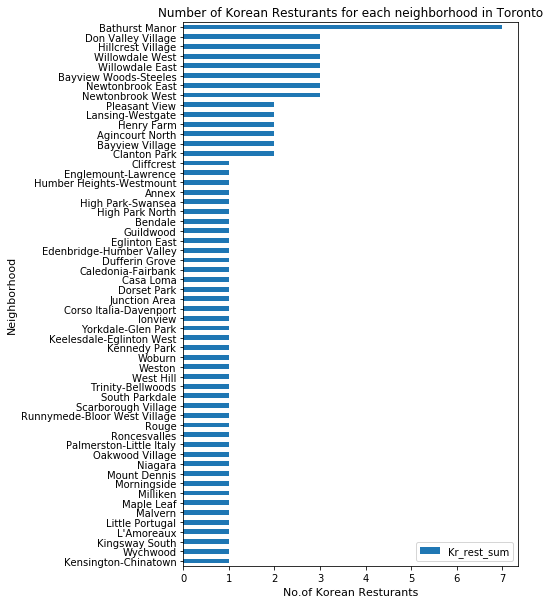

In [39]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
kr_rest_toronto_sum.plot(kind='barh',figsize=(6,10))
# title
plt.title('Number of Korean Resturants for each neighborhood in Toronto')
#On x-axis
plt.ylabel('Neighborhood', fontsize = 11)
#On y-axis
plt.xlabel('No.of Korean Resturants', fontsize=11)
#giving a bar plot
#kr_rest_toronto.groupby('Neighborhood')['ID'].count().plot(kind="bar")
#legend
plt.legend()
#displays the plot
plt.show()

Noe we collect the Korean resturatnt we collect from Foursquare API. Let remame column "ID" to "Kr_rest_sum"
And set its datatypes to integer

In [30]:

kr_rest_toronto_sum.rename(columns={"Neighborhood": "Neighbourhood"},inplace = True)
kr_rest_toronto_sum["Kr_rest_sum"] = kr_rest_toronto_sum["Kr_rest_sum"].astype(int)
kr_rest_sum=kr_rest_toronto_sum.reset_index()
kr_rest_sum.head()
#project.save_data(data=kr_rest_toronto_sum.to_csv(index=False),file_name='kr_rest_toronto_sum.csv',overwrite=True)

,Neighborhood,Kr_rest_sum
0,Kensington-Chinatown,1
1,Wychwood,1
2,Kingsway South,1
3,L'Amoreaux,1
4,Little Portugal,1


In [31]:
toronto_kr3=toronto_kr1
toronto_kr3.shape



(105, 13)

Let us join it with previous dataframe 'toronto_kr' by "Neighbourhood". 

In [32]:
#kr_final = toronto_kr3.reindex(columns=toronto_kr.columns.union(kr_rest_toronto_sum.columns))
#kr_final=toronto_kr3.set_index('Neighbourhood').join(kr_rest_toronto_sum.set_index('Neighbourhood'))

#kr_final=toronto_kr3.merge( kr_rest_sum, left_on='Neighbourhood',right_on='Neighborhood')
kr_final=pd.merge_ordered(toronto_kr3, kr_rest_sum, left_on='Neighbourhood',right_on='Neighborhood')
#df1.merge(df2, left_on='lkey', right_on='rkey')
kr_final.head()
#kr_final=toronto_kr3

,Neighbourhood,Total Population,Mother tongue Korean,Speaking Korean at home,Knowledge of Korean,Visible minority population,Ethnic origin as Korean,Using Korean at work,Average individual income,Korean index,Normalized index,latitude,longitude,Neighborhood,Kr_rest_sum
0,Agincourt North,29113,50,35,60,70,100,0,30414,1600,0.054958,43.808038,-79.266439,Agincourt North,2.0
1,Alderwood,12054,30,25,45,65,75,0,47709,1180,0.097893,43.601717,-79.545232,NaN,NaN
2,Annex,30526,420,235,520,605,635,10,112766,12440,0.407521,43.670338,-79.407117,Annex,1.0
3,Banbury-Don Mills,27695,420,280,465,560,575,0,67757,12000,0.433291,43.734804,-79.357243,NaN,NaN
4,Bathurst Manor,15873,270,200,285,305,305,20,45936,7660,0.482580,43.763893,-79.456367,Bathurst Manor,7.0


In [33]:
kr_final = kr_final.drop('Neighborhood', 1)

Replace NaN in Kr_rest_sum to 0.

In [34]:
kr_final['Kr_rest_sum'].fillna(0, inplace=True)
kr_final.head()

,Neighbourhood,Total Population,Mother tongue Korean,Speaking Korean at home,Knowledge of Korean,Visible minority population,Ethnic origin as Korean,Using Korean at work,Average individual income,Korean index,Normalized index,latitude,longitude,Kr_rest_sum
0,Agincourt North,29113,50,35,60,70,100,0,30414,1600,0.054958,43.808038,-79.266439,2.0
1,Alderwood,12054,30,25,45,65,75,0,47709,1180,0.097893,43.601717,-79.545232,0.0
2,Annex,30526,420,235,520,605,635,10,112766,12440,0.407521,43.670338,-79.407117,1.0
3,Banbury-Don Mills,27695,420,280,465,560,575,0,67757,12000,0.433291,43.734804,-79.357243,0.0
4,Bathurst Manor,15873,270,200,285,305,305,20,45936,7660,0.482580,43.763893,-79.456367,7.0


Now we can use Korean index, Kr_rest_sum and income to do the data analysis.
Ideally, we want to find a neighbourhood with high Korean_index, high income, but low Kr_rest_sum.
But also can accept a neighbourhood with high Korean_index, high income, also high Kr_rest_sum.
We would like to avoid a neighbourhood with low Korean_index, low income, also low Kr_rest_sum.
Hence we can plot all the neighbourhood with these three values as coordinates in the 3D space.
But first we need to normalize the data. 

In [35]:
kr_plot = kr_final[['Neighbourhood','Kr_rest_sum','Korean index','Average individual income']]
kr_plot.head()

,Neighbourhood,Kr_rest_sum,Korean index,Average individual income
0,Agincourt North,2.0,1600,30414
1,Alderwood,0.0,1180,47709
2,Annex,1.0,12440,112766
3,Banbury-Don Mills,0.0,12000,67757
4,Bathurst Manor,7.0,7660,45936


In [36]:
cols_to_norm = ['Korean index','Average individual income']
#kr_plot[cols_to_norm] = kr_plot[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#kr_plot[cols_to_norm] = kr_plot[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))
cols_to_norm = ['Korean index']
kr_plot[cols_to_norm] = kr_plot[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
cols_to_norm = ['Average individual income']
kr_plot[cols_to_norm] = kr_plot[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))
#print(kr_plot)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


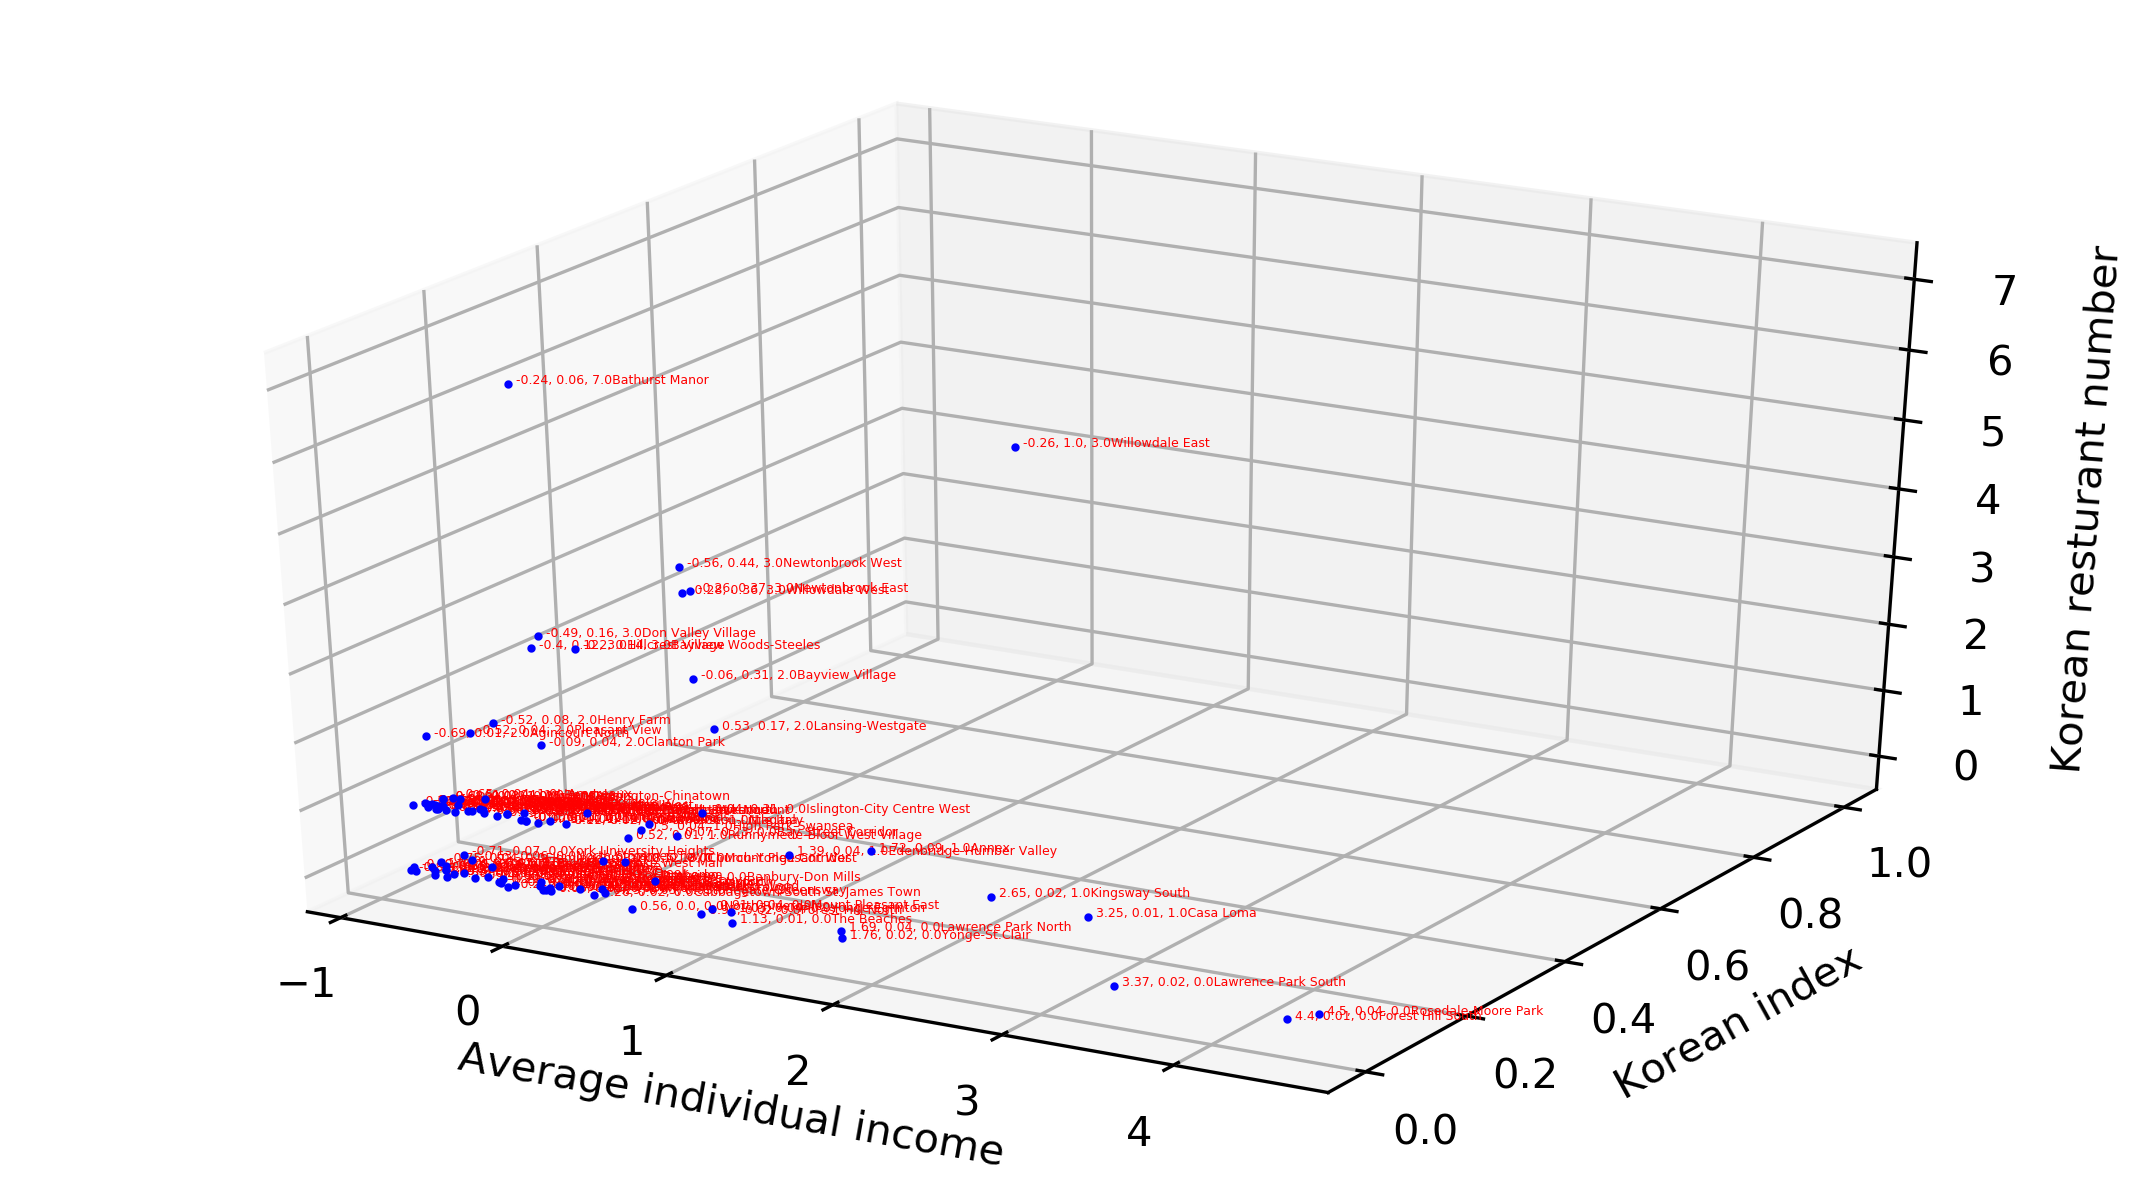

In [37]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
threedee = plt.figure(figsize=(9,5), dpi = 300)
ax = threedee.gca(projection='3d')

for i in range(0, len(kr_plot)):
    y=kr_plot.iloc[i]['Korean index']
    x=kr_plot.iloc[i]['Average individual income']
    z=kr_plot.iloc[i]['Kr_rest_sum']
    x=round(x, 2)
    y=round(y, 2)
    label = '  {}, {}, {}'.format(x,y,z)+kr_plot.iloc[i]['Neighbourhood']
    ax.scatter(x,y,z,s=1,marker="o", color='b') 
    ax.text(x,y,z,label, size=3,color='red')
#ax.axes.set_xlim3d(0,1)
#ax.axes.set_ylim3d(0,3)
#ax.axes.set_zlim3d(0,10)
ax.set_zlabel('Korean resturant number')
ax.set_ylabel('Korean index')
ax.set_xlabel('Average individual income')
#ax.scatter(kr_plot['Korean index'], kr_plot['Average individual income'],kr_plot['Kr_rest_sum'])
plt.show()

Here we found an apparent outlier, Willow dale East, which has very high korean index, relative good average income, but low 
Korean restaurant number as 3. Hence it could be our option. We can further explore the data with bubble plot.  

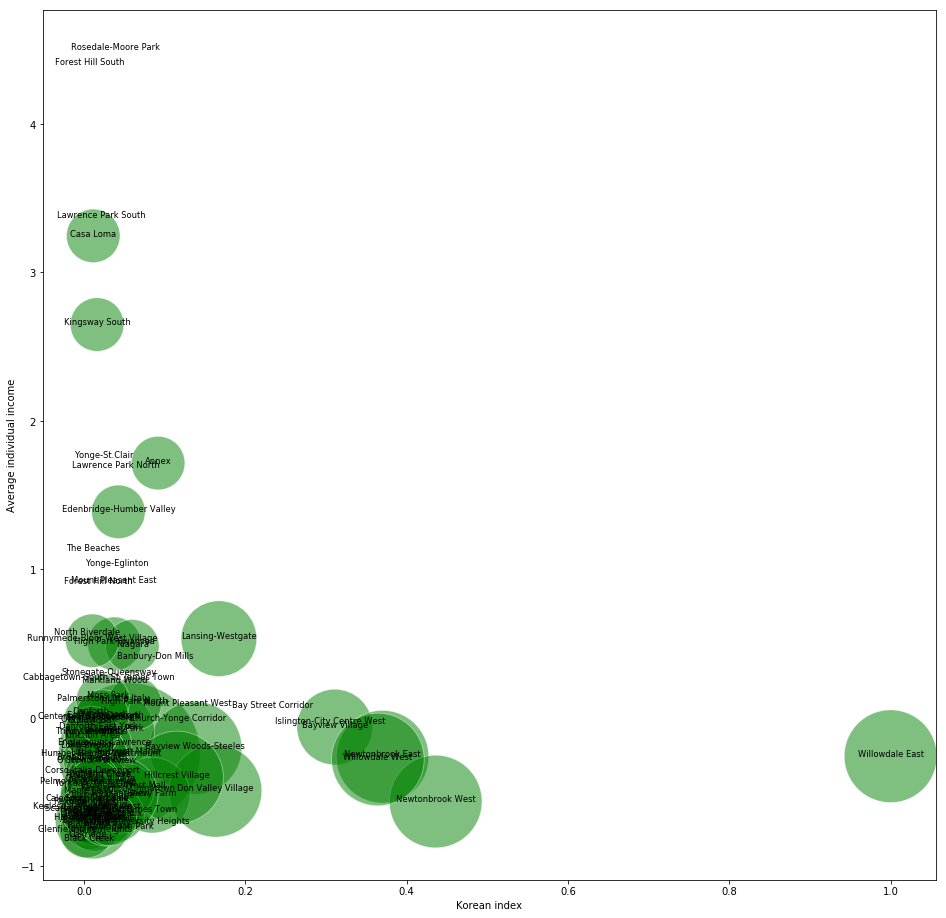

In [38]:
import seaborn as sns
norm_kr_rest = (kr_plot['Kr_rest_sum'] - kr_plot['Kr_rest_sum'].min()) / (kr_plot['Kr_rest_sum'].max() - kr_plot['Kr_rest_sum'].min())
plt.figure(figsize = (16,16))
ax = sns.scatterplot(kr_plot['Korean index'], kr_plot['Average individual income'], alpha = 0.5,color='green',s = norm_kr_rest*20000)
for i in range(0,kr_plot.shape[0]):
    x=kr_plot.iloc[i]['Korean index']
    y=kr_plot.iloc[i]['Average individual income']
    z=kr_plot.iloc[i]['Kr_rest_sum']
    label = kr_plot.iloc[i]['Neighbourhood']
    ax.text(x, y, label, horizontalalignment='center', size="small", color='black')
            

We can further verify the decision with the bubble plot. Again, Willowdale East will still stand out, which has very high Korean index, relatively good average income, but very low Korean restaurant number as 1. Hence, we would suggest Dongjun to start his restaurant there. Newtonbrook West, Newtonbrook East, and  Willowdale West could be his second group choice, who also has a slight less Korean index, but similar level of average income and few competitors as 3. 
